<a href="https://colab.research.google.com/github/kanyijohn/Deep-Learning-ML-models/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
import numpy as np

# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(vocab_size, max_length) = (10000, 100)  # 10,000 words, max 100 words per review

# Load data and split into training and testing sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to make them uniform
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Build the RNN Model with LSTM
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Word embeddings (word to vector)
    Bidirectional(LSTM(64, return_sequences=True)),  # First LSTM layer (returns sequences for stacking) # Moved return_sequences to LSTM
    Bidirectional(LSTM(32)),  # Second LSTM layer (outputs final sequence)
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.6821 - loss: 0.5657 - val_accuracy: 0.7992 - val_loss: 0.4275
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8848 - loss: 0.2892 - val_accuracy: 0.8103 - val_loss: 0.4174
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9304 - loss: 0.1871 - val_accuracy: 0.7990 - val_loss: 0.4750
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9671 - loss: 0.1037 - val_accuracy: 0.7702 - val_loss: 0.6998
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9773 - loss: 0.0649 - val_accuracy: 0.7717 - val_loss: 0.8069


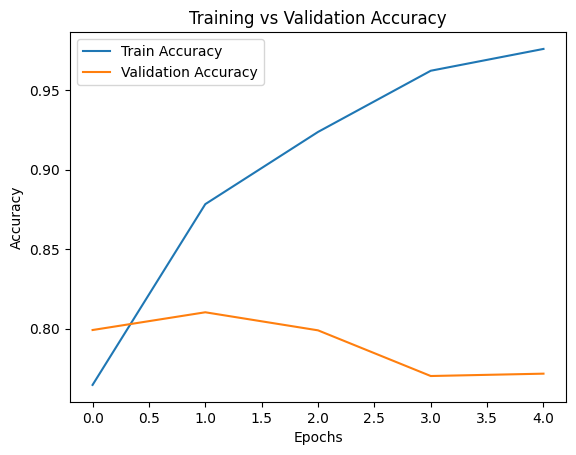

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7736 - loss: 0.7971
Test Accuracy: 0.7717


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


In [1]:
embedding_layer = Embedding(vocab_size, 300, weights=[glove_matrix], trainable=False)


NameError: name 'Embedding' is not defined